# Experimenting with OCR
Optical Character Recognition (OCR), as the name suggests, involves the recognition of characters in an image in order to make text searchable (or otherwise computationally actionable). If you've ever worked with a PDF that appeared to be a photographic reproduction of pages from a book or journal, but that allowed you to select text to copy and paste, you've benefited from OCR. 

There are various pieces of commercial software that can perform OCR. [ABBYY FineReader PDF](https://pdf.abbyy.com) is often mentioned as an especially good one. OCR capabilities are also built into Adobe Acrobat Pro, for instance (though Adobe has apparently licensed its OCR technology from [I.R.I.S](https://www.irislink.com/EN-US/c1730/Readiris-17--the-PDF-and-OCR-solution-for-MAC-.aspx). Given that I.R.I.S. is "A Canon Company," my hunch is that this is the same technology that allows me to run OCR on pages I run through the photocopier/scanner in my department office.)

## Commercial OCR Software: Great for Some Things...

Commercial OCR software can provide very good results when presented with reasonably clear images of modern text. Let's consider the first page of F. Scott Fitzgerald's *The Great Gatsby*, which we can get as a surprisingly small (ca. 800KB) .jpg file from the Internet Archive (but which I've reduced in size for display purposes). 

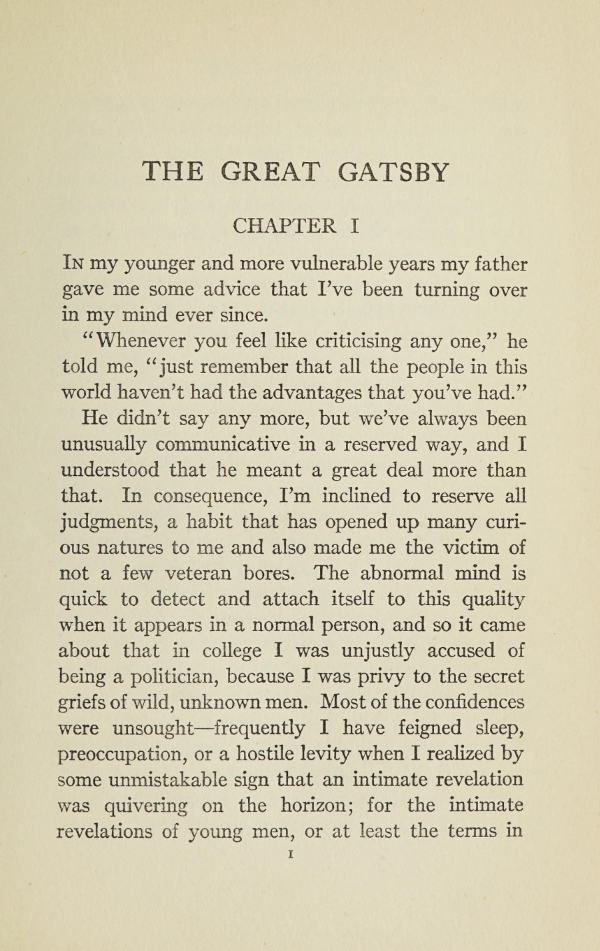

### Acrobat OCR on modern print
Even given this comparatively small image in a format that involves lossy compression, Adobe Acrobat's OCR does an excellent job: 



```
THE GREAT GATSBY
CHAPTER I
IN my younger and more vulnerable years my father
gave me some advice that I've been turning over
in my mind ever since.

"Whenever you feel like criticising any one," he
told me, "just remember that all the people in this
world haven't had the advantages that you've had."
He didn't say any more, but we've always been
unusually communicative in a reserved way, and I
understood that he meant a great deal more than
that. In consequence, I'm inclined to reserve all
judgments, a habit that has opened up many curious
natures to me and also made me the victim of
not a few veteran bores. The abnormal mind is
quick to detect and attach itself to this quality
when it appears in a normal person, and so it came
about that in college I was unjustly accused of
being a politician, because I was privy to the secret
griefs of wild, unknown men. Most of the confidences
were unsought-frequently I have feigned sleep,
preoccupation, or a hostile levity when I realized by
some unmistakable sign that an intimate revelation
was quivering on the horizon; for the intimate
revelations of young men, or at least the terms in
I
```


## ... Not So Great for Other Things.

But Acrobat runs into trouble when presented with historic print, like this page from James Thomson's 1730 play *Sophonisba* (which I am again, presenting in reduced size here, but which we will work with as an almost-archival-quality 400dpi TIFF file later):

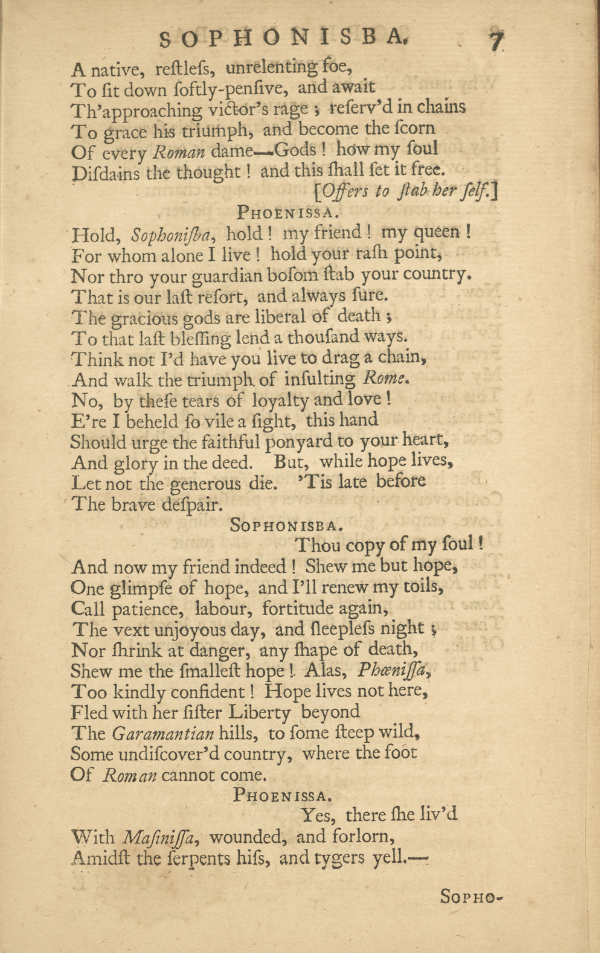

### Acrobat OCR on eighteenth-century print
This is what Acrobat produces: 

```
SOPHONISBA, 1
A native, reftlefs, unrelenting foe,
To fit down foftly-penfive, and await
Th'approaching victor's rage; referv'd in chains
To grace his triumph, and become the fcorn
Of every Roman dame-Gods ! how my foul
Pifdains the thought! and this ihall fet it free.
[Offers to flab her /elf.]
PHO EN ISSA.
Hold, Sophonijba, hold! my friend ! my queen !
 p or whom alone I live ! hold your raih point, .
Nor thro your guardian bofom ftab your country.
That is our laft refort, and always fore.
The gracious gods are liberal of death;
To that laft bleffing lend a thoufand ways.
Think not I'd have you live to drag a chain,
And walk the triumph. of infulting Rome.
No, by thefe tears of loyalty and love!
E're I beheld fo vile a fight, this hand ..
_Should urge the faithful pon yard to your heart,
And glory in the deed. Bur, while hope lives,
Let not the generous die. 'Tis late _before
The brave def pair.
SoPHONISBA.
  Thou copy of my foul !
And now my friend indeed ! Shew me but hope,
One glimpfe of hope, and I'll renewmy toils,
Call patience, labour, fortitude again,
The v.ext unjoyous day, and fleeplefs night  
Nor ihrink at danger, any fhape of death,
Shew me the fmalleft hope !. Alas, P htcnijfa,,
Too kindly confident! Hope lives not here,
Fled with her lifter Liberty beyond  
The Garamantian hills, to fome fteep wild,
Some undifcover'd country, where the foot
Of Rom an cannot come.
PHO EN ISSA.
Yes, there ihe liv' d
With Majinijfa, wounded, and forlorn,
~midft the ferpents hifs, and tygers yell.~
SOP HO--
```
All things considered, that's not bad. But it's not really great, either.

Archaic letter forms are clearly a problem: the long-s prefents confpicuous problems throughout, especially when it appears in ligatures with characters with ascenders, like 'ſhall' towards the end of the sixth line in the text block. The italic typeface here seems to present particular difficulties (note the hash that's made of "Phoeniſſa" in the seventh line of Sophonisba's last speech: the 'oe' ligature does not fare at all well, and the italic double long-s ligature, with its descenders, is totally confounding. There would seem to be other factors at play, too, all having to do with the variability of handpress-era printing: we end up with extra spaces in some places (as in "Rom an" in the last line of Sophonisba's last speech) and lost spaces in others (as in "renewmy toils" in the second line of Sophonisba's last speech).

It's worth pointing out that, while I've reduced the size of the page image here, the actual image used for OCR here is a high-resolution TIFF file produced under pretty much ideal circumstances at the University of Pennsylvania's Van Pelt Library: the issues we're seeing are with the language model that Acrobat is using to try to recognize text in the image, not artifacts of poor-quality imaging.

Of course, Acrobat is software that's aimed mainly at office productivity, so it really can't be blamed for not handling this kind of print well—as long as you don't insist on have your annual report set by compositors and worked off on a common press before scanning, you should be fine using Acrobat OCR for the things it's designed to do. 

But Acrobat's clearly not really the right tool for this task and there's not really any way for us to improve its output: we don't have any access to the language model that Adobe is using for OCR, and we can't replace Acrobat's language model with a more suitable one of our own.



## Tesseract: Open-Source, Trainable OCR
Tesseract is open-source optical character recognition (OCR) software that has been [sponsored by Google since 2006](https://en.wikipedia.org/wiki/Tesseract_(software). Tesseract has been trained to recognize text in [a number of different languages](https://tesseract-ocr.github.io/tessdoc/Data-Files-in-different-versions.html) and, when given reasonably good-quality images of pages in a range of modern typefaces, Tesseract can produce highly accurate results.

Here's Tesseract's output from the same page of *The Great Gatsby* we looked at above, which is almost exactly as good as Adobe's:

```
THE GREAT GATSBY

CHAPTER I

IN my younger and more vulnerable years my father
gave me some advice that I’ve been turning over
in my mind ever since.

“Whenever you feel like criticising any one,” he
told me, “‘just remember that all the people in this
world haven’t had the advantages that you’ve had.”

He didn’t say any more, but we’ve always been
unusually communicative in a reserved way, and I
understood that he meant a great deal more than
that. In consequence, I’m inclined to reserve all
judgments, a habit that has opened up many curi-
ous natures to me and also made me the victim of
not a few veteran bores. The abnormal mind is
quick to detect and attach itself to this quality
when it appears in a normal person, and so it came
about that in college I was unjustly accused of
being a politician, because I was privy to the secret
eriefs of wild, unknown men. Most of the confidences
were unsought—frequently I have feigned sleep,
preoccupation, or a hostile levity when I realized by
some unmistakable sign that an intimate revelation
was quivering on the horizon; for the intimate

revelations of young men, or at least the terms in
I
```

And here's Tesseract's output from the page of Sophonisba that we looked at, above: 

```
SOPHONISBA. 3

Extinguifh’d foon ; when once to Scipio’s fide
Won o’er, and dazled by th’ enchanting glare
Of that fair feeming heroe, he became
A gay admiring flave, yet knew itnot.
E’er fince, my heart has held him in contempt ;
And thrown out each idea of his worth,
That there began to grow: nay had it been
As all-poffeft, and foft, as her’s who fits
In fecret fhades, or by the falling ftream,
And waftes her being in unutter’d pangs,
I would have broke, or cur’d it of its fondnefs,
PHOENISSA,
Heroic Sophonifba !
SOPHONISBA,

7 No, Pheniffa ;
It is not for the daughter of great A/drubal,
Defcended from a long illuftrious line
Of Carthaginian heroes, who have oft
Fill’d Italy with terror and difmay,
And fhook the walls of Rome, to pine in love,
Like a deluded maid; to give her life,
And heart high-beating in her country’s caufe,
Meant not for common aims and houfhold cares, —
To give them up to vain prefuming man ;
Much lefs to one who itoops the neck to Rome,
An enemy to Carthage, Majiniffa.

. PHOENISSA.
Think not I mean to check that glorious flame,
That juft ambition which exalts your foul,
Fires on your cheek, and lightens in your eye.
Yet would he had been yours! this riftng prince ;
For, truft me, fame is fond of Mafiniffa.
His various fortune, his refplendent deeds,
His courage, conduét, deep-experienc’d youth,
And vaft unbroken fpirit in diftrefs,
Still rifing ftronger from the laft defeat,
Are all the talk and terror too of Afric.
Who has nat heard the ftory of his woes?

How hard he came to his paternal reign 5
Whence foon by Syphax* unrelenting hate,
```
This is pretty much on a par with Adobe's output: it's a little better in some places, but a little worse in other places. With Tesseract, however, it's possible to train the software to recognize the characters that are presenting problems.

In this notebook, we'll end up working with a very minimal Tesseract training that at least points to some of the possibilities for training OCR for historic print. This training is doomed to be far from perfect, because it really doesn't offer enough data: it uses images of lines from one of Penn's copies of Thomson's *Sophonisba*, paired with a "ground truth" transcription derived from the ECCO-TCP text for the play as its sole training data. The training will do artificially well on page images from *Sophonisba*, but it does show an improvement in the recognition of the long-s character when given other eighteenth-century print. 

```
SO PRONICSERA. y

Extinguiſh'd ſoon; when once to Scipio's fide
Won o'er, and dazled by th' enchanting glare
Of that fair ſeeming heroe, he became
A gay admiring ſlave, yet knew it not.
E'et ſince, my heart has held him in contempt;
And thrown out each ides of his worth,
That there began to grow: nay had it been
As all-poſſeſt, and ſoft, as her's who ſits
In fecret ſhades, or by the falling ſtream,
And waſtes her being in unutter'd pangs,
I would have broke, or cur'd it of its fondneſs.
PHOENISSA.
Heroic Sophoniſba!
SOPHONISSBA.

No, Phaeniſſa;
It is not for the daughter of great Aſdrubal,
Deſcended from a long illuftrious line
Of Carthaginian heroes, who have oft
Fill'd ftaly with terror and diſmay,
And ſhook the walls of Rome, to pine in love,
Like a deluded maid; to give her life,
And heart high-beating in her country's cauſe,
Meant not for common aims and houſhold cares,
To give them up to vain preſuming man;
Much leſs to one who ſtoops the neck to Rome,
An enemy to Carthage, Maſiniſſa.

. PHOENISSA.
Think not I mean to check that glorious flame,
That luſt ambition which exalts your ſoul,
Fires on your cheek, and lightens in your eye.
Yet would he had been yours! this riſing prince;
For, truſt me, fame is Of Maſiniſſa,
His various fortune, his reſplendent deeds,
His courage, conduct, deep-experienc'd youth,
And vaſt unbroken ſpirit in diſtteſs,
Still riſing ſtronger from the laſt defeat,
Are all the talk and terror too of Afrie.
Who has not heard the ſtory of his woes?

How hard he came to his paternal teign;
Whence ſoon by Syphax' unrelenting hate,
```
This notebook aims to open a discussion of the possibilities for using OCR as a tool for bibliographical research, even if the OCR training used here can't really deliver on those possibilities. 

### About the Tesseract training we'll see in this notebook
To train Tesseract, you need sample data, comprising images of the kind of text you want to recognize and "ground truth" transcriptions of that text—Tesseract needs to know what the text really says so that it can learn to recognize the characters you want it to. 

Training images can be produced digitally, if you're trying to train Tesseract to recognize a new language, a distinctive typeface, or text in a writing system for which there's not yet a training. If you could produce something that resembles the text you want to be able to recognize in a word processor, then you could generate training text that way and save it as images. It's also possible to train Tesseract from photographs of documents, which is the approach I took to trying to improve Tesseract's recognition of eighteenth-century print.

Whatever the source of the training images, Tesseract also needs a known-good transcription of the text (a "ground truth" from which to evaluate how well it's recognizing the text in the images you're showing it). 

I prepared the `sophonisba` "language" we'll end up looking at in this notebook using page images from Penn's PR3732 T7 1730b and a version of the ECCO-TCP text of *Sophonisba*, which I tweaked a bit myself, supplying gaps in the transcription using PR3732 T7 1730b and correcting a few transcription errors by consulting that copy. 

I was confident that this copy was a good match for the ECCO-TCP transcription, because the transcription matched the page images on 19 of 20 textual points I had identified by collating three copies at Penn and twelve copies at UVA. (The twentieth point was a catchword, which isn't included in the ECCO-TCP transcription.)

I used a script called [`tesstrain`](https://github.com/tesseract-ocr/tesstrain) that helps to automate the training procedure. `Tesstrain` requires images and transcriptions not of pages of text, but of individual *lines* of text. 

As it happened, even without training, Tesseract was quite accurate at identifying lines of type in the page images of *Sophonisba*: it didn't necessarily get the text *right*, but it certainly recognized where the text *was*. I ran Tesseract on all of the pages of PR3732 T7 1730b and saved the results as [hOCR](https://en.wikipedia.org/wiki/HOCR), a form of XML that presents not just the recognized text, but also information about the location of the text on the page that was recognized. I could extract the coordinates for each line of text and use those coordinates to isolate line-level images.

This is the hOCR data for the first line of Tesseract's initial recognition of the page of *Sophonisba* given above:

```
<span class='ocr_line' id='line_1_2' title="bbox 257 186 1479 257; baseline -0.005 -13; x_size 70; x_descenders 18; x_ascenders 20">
  <span class='ocrx_word' id='word_1_3' title='bbox 257 186 595 257; x_wconf 81'>Extinguifh’d</span> 
  <span class='ocrx_word' id='word_1_4' title='bbox 626 191 740 240; x_wconf 90'>foon</span> 
  <span class='ocrx_word' id='word_1_5' title='bbox 762 211 777 244; x_wconf 89'>;</span> 
  <span class='ocrx_word' id='word_1_6' title='bbox 810 189 946 238; x_wconf 96'>when</span> 
  <span class='ocrx_word' id='word_1_7' title='bbox 968 205 1085 238; x_wconf 96'>once</span> 
  <span class='ocrx_word' id='word_1_8' title='bbox 1107 202 1161 238; x_wconf 92'>to</span> 
  <span class='ocrx_word' id='word_1_9' title='bbox 1172 190 1366 253; x_wconf 88'>Scipio’s</span> 
  <span class='ocrx_word' id='word_1_10' title='bbox 1384 190 1479 238; x_wconf 96'>fide</span> 
     </span>
```
And here is an image of a portion of that page with the boxes derived from each `ocr_line` span:

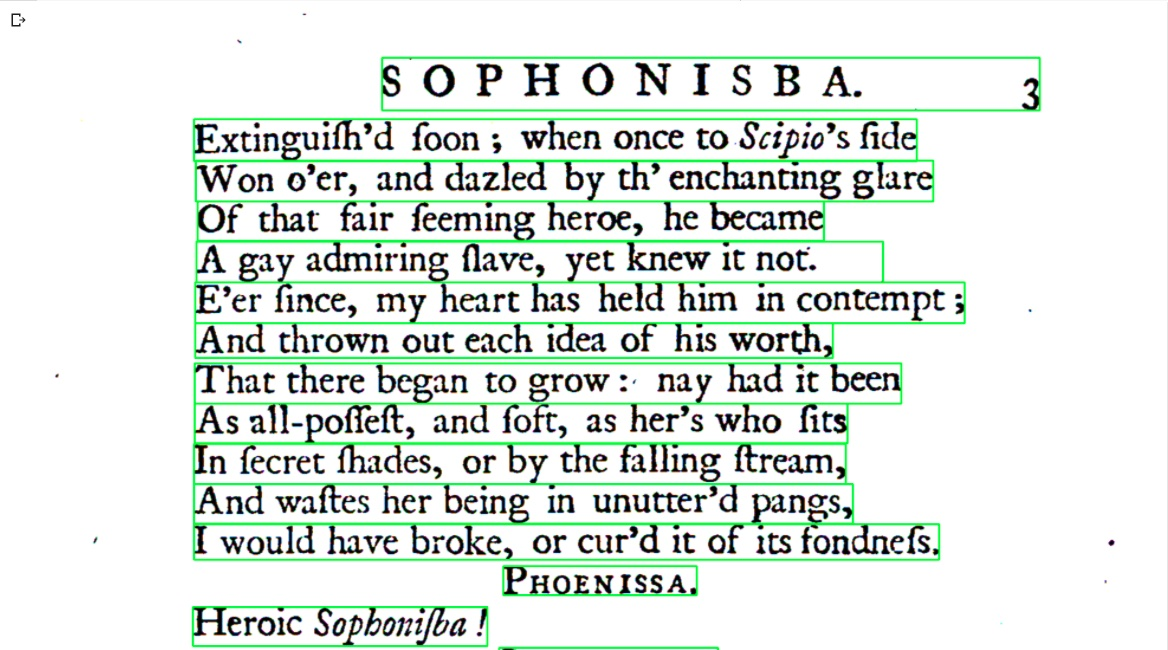

For the ground truth text, I turned to my modified version of the ECCO-TCP transcription. It took a little work to use this text for this purpose because the model of the text that the ECCO-TCP project (understandably) privileges the *text* of the play over the structure of the book: dividing this TEI-encoded text into "pages" was not straightforward, and involved mostly ignoring all of the carefully-tagged XML in the file. (If you care about TEI markup, I will apologize now for what I had to do.) Eventually, though, I had a folder full of very small text files: each file representing one line of the play

I ended up writing some Python code to compare Tesseract's untrained output to these line-level TCP transcriptions and accept the TCP transcription as the correct version of the line if certain conditions were met. (This worked because Tesseract's untrained output wasn't *that* bad, to begin with. If this were text that Tesseract had a harder time with, it would be necessary to provide the ground truth transcription from scratch.) I wasn't able to match every line-level image to a line-level text file, but in the end I had a bit more than 2,600 lines of text to work with.

I also used NLTK (and a fair amount of rough-and-ready post-processing) to provide a list of words from ECCO-TCP and a list of punctuation patterns found in that corpus. 

With all of these various files ready to go, I used `tesstrain` to create a new language model based on Tesseract's existing English language model (I didn't want the *only* text my model knew to be that of *Sophonisba*). Because I was working with a fairly small set of line-level images and ground truth, `tesstrain` was able to complete a training of 10,000 iterations in an hour. After that, I used the checkpoints that Tesstrain had saved to experiment with creating models using fewer or more iterations.

As we'll see, this wasn't enough to get the kind of reliability I'd like for an OCR model: I think I would need more images for Tesseract to be able to build up a good generalized understanding of the letter forms that I'm interested in, and I also have some hypotheses I'd like to test about what should be considered a "letter" in this training, given the realities of eighteenth-century printing.

## Actually using Tesseract
For now, let's just see what Tesseract does. In addition to the by-now-familiar process of connecting to Google Drive and moving files into the Colaboratory environment, the code cells below will install Tesseract and the `pytesseract` Python wrapper and will add  the `sophonisba` language model to our installation of Tesseract. Then we'll test some output to see the different kinds of things Tesseract can show us.

In [ ]:
#Code cell #1
#Connect to Google Drive
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
#Code cell #2
#Move images from RBS shared folder to Colaboratory environment
%cp /gdrive/MyDrive/L-100a/page_images.zip /content/page_images.zip
!unzip /content/page_images.zip
%cd /content/page_images/
!unzip penn_pr3732_t7_1730b.zip

In [ ]:
#Code cell #3
#Install Tesseract and Pytesseract
!apt install tesseract-ocr
!pip install pytesseract

In [ ]:
#Code cell #4
#Add 'sophonisba' language model to Tesseract
%cp /gdrive/MyDrive/L-100a/sophonisba.traineddata /usr/share/tesseract-ocr/4.00/tessdata/sophonisba.traineddata

### Trying it out
The next cell gives you a way to choose different pages from *Sophonisba* to OCR. You won't need to run through too many to get a feel for what's going on, but I wanted you to be able to try

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact
image_select = widgets.Dropdown(
    description='Choose image',\
    options = [i for i in range(1,86)],\
    value = 9,\
    style={'description_width': 'initial'})
display(image_select)

In [ ]:
import pytesseract
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
source_directory = '/content/page_images/penn_pr3732_t7_1730b/bw/'
page = str(image_select.value).zfill(4)
imagefile = source_directory + 'PR3732_T7_1730b_body' + page + '-bw.tif'
im = cv2.imread(imagefile, cv2.IMREAD_ANYCOLOR)
# string = pytesseract.image_to_string(pil_im, lang='sophonisba')
# print(string)
cv2_imshow(im)

#### Recognizing text
The most common use for Tesseract is to recognize text in an image, which we can do using `pytesseract`'s `image_to_string` function. First we'll recognize the text in the image using Tesseract's default English training, then in the next cell we'll try it with the `sophonisba` model.

In [ ]:
eng_string = pytesseract.image_to_string(im)
print(eng_string)

In [ ]:
trained_string = pytesseract.image_to_string(im, lang='sophonisba')
print(trained_string)

#### Other kinds of output
I've shown you a sample above of the hOCR output that's produced by `pytesseract`'s `image_to_pdf_or_hocr` function. If set to produce a pdf, instead, that function will produce a searchable PDF—that's really not worth doing with this inadequate model, but it's nice to know it can be done. (Though I don't think it would be advisable to produce a searchable PDF riddled with long-s characters: if we wanted to use this to produce searchable text, we would want to have an alternative model that would modernize long-s.)

`Pytesseract` can also output more information about its recognition of text. The `image_to_data` function will show word-level coordinates and can also produce word-level confidence scores.

In [ ]:
trained_data_str = pytesseract.image_to_data(im, lang='sophonisba')
print(trained_data_str)

In [ ]:
from pytesseract import Output
trained_data_df = pytesseract.image_to_data(im, lang='sophonisba', output_type='data.frame')
print(trained_data_df)

It's also possible to use `image_to_boxes` to get character-level coordinates. I'm finding that those coordinates aren't always quite as accurate as I'd expect—especially given that the recognized text is often correct, even if the coordinates don't seem to align quite correctly with the characters in the image.

In [ ]:
import numpy as np

display_im = cv2.cvtColor(im, cv2.COLOR_BAYER_GR2BGR)

height = im.shape[0]
width = im.shape[1]

trained_boxes = pytesseract.image_to_boxes(im, output_type=Output.DICT)

n_boxes = len(trained_boxes['char'])
for i in range(n_boxes):
    (text,x1,y2,x2,y1) = (trained_boxes['char'][i],trained_boxes['left'][i],
                          trained_boxes['top'][i],trained_boxes['right'][i],
                          trained_boxes['bottom'][i])
    cv2.rectangle(display_im, (x1,height-y1), (x2,height-y2) , (0,255,0), 2)
cv2_imshow(display_im)


## Examine the output
As you can see, the results of this relatively small-scale training aren't really ready for prime time, and certainly not ready to drive work in analytical bibliography: I wouldn't want to rely on this model to give me an accurate sense of what characters are actually on the page.

Have a look at the ways that this model falls down, though, and see if you can think of possible applications for using a *better* model to study printed texts.